In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pandas as pd
import numpy as np
from IPython.display import *

import AssembleData

## Build Data Frame 

In [2]:
# Build Dataframe 
MAL_df, all_genre  = AssembleData.read_files_all()

In [3]:
print len(MAL_df)

5628


In [4]:
MAL_df.head()

,action,adventure,aired_end,aired_start,broadcast,cars,category,comedy,dementia,demons,...,super power,supernatural,synopsis,thriller,title,type,url,vampire,yaoi,yuri
0,0,0,2008-04-04T00:00:00,2007-10-18T00:00:00,Unknown,0,anime,0,0,0,...,0,1,In an isolated region of Kyushu lies the town ...,0,Shinreigari: Ghost Hound,TV,https://myanimelist.net/anime/2596/Shinreigari...,0,0,0
0,0,0,2008-06-25T00:00:00,2008-06-25T00:00:00,None,0,anime,1,0,0,...,0,0,Special episode based on manga Navigation 39 e...,0,Aria The Origination: Sono Choppiri Himitsu no...,Special,https://myanimelist.net/anime/4772/Aria_The_Or...,0,0,0
0,1,0,2008-09-16T00:00:00,2008-07-01T00:00:00,Unknown,0,anime,0,0,0,...,0,0,044 becomes the strongest female soldier excel...,0,Ultraviolet: Code 044,TV,https://myanimelist.net/anime/4264/Ultraviolet...,0,0,0
0,1,0,2008-09-29T00:00:00,2008-04-07T00:00:00,Unknown,0,anime,1,0,0,...,0,1,"Silent, apathetic, yet mischievous, 14-year-ol...",0,Nabari no Ou,TV,https://myanimelist.net/anime/3655/Nabari_no_Ou,0,0,0
0,0,0,2008-12-19T00:00:00,2008-12-19T00:00:00,None,0,anime,1,0,0,...,1,0,A special Christmas episode.,0,Sore Ike! Anpanman: Franken-Robo-kun's Surpris...,Special,https://myanimelist.net/anime/17004/Sore_Ike_A...,0,0,0


In [5]:
# Genra tag extractor test 
test = MAL_df[MAL_df['id'] == 4264]
test['action']

0    1
Name: action, dtype: int64

### Total Count for Each Genre 

In [36]:
all_genre_counts = []
for genre in all_genre:
    all_genre_counts.append(len(MAL_df[(MAL_df[genre] == 1)]))

# Display 
genre_df = pd.DataFrame(
    {'Genre' : all_genre,
     'Count' : all_genre_counts
    
    })
genre_df.sort_values('Count', ascending = False)

,Count,Genre
4,2829,comedy
10,1768,action
11,1206,fantasy
5,1184,shounen
18,1136,adventure
2,1088,sci-fi
12,1064,drama
19,976,romance
8,890,school
3,751,supernatural


## Genre Subsets 

In [37]:
# lists of dataframes by Genra 
genre_subsets = [ MAL_df[MAL_df[genre] == 1] for genre in all_genre]

# TODO: IMPROVE THIS CODE 

duration_mean = []
episodes_mean = []
favorites_mean = []
members_mean = []
popularity_mean = []
rank_mean = []
score_mean = []
score_users_mean = []
for df in genre_subsets:
    duration_mean.append(df["duration"].mean())
    episodes_mean.append(df["episodes"].mean())
    favorites_mean.append(df["favorites"].mean())
    members_mean.append(df["members"].mean())
    popularity_mean.append(df["popularity"].mean())
    rank_mean.append(df["rank"].mean())
    score_mean.append(df["score"].mean())
    score_users_mean.append(df["score_users"].mean())
    
#genre_df["duration_mean"] = duration_mean
#genre_df["episodes_mean"] = episodes_mean
#genre_df["favorites_mean"] = favorites_mean
#genre_df["members_mean"] = members_mean
genre_df["popularity_mean"] = popularity_mean
genre_df["rank_mean"] = rank_mean
genre_df["score_mean"] = score_mean
#genre_df["score_users_mean"] = score_users_mean

In [38]:
genre_df.head()

,Count,Genre,popularity_mean,rank_mean,score_mean
0,362,mystery,2301.339779,2202.096685,7.455193
1,158,psychological,1438.379747,1890.184713,7.534873
2,1088,sci-fi,3192.631434,3264.154554,7.088199
3,751,supernatural,2031.584554,2502.302826,7.323302
4,2829,comedy,3448.318841,3532.246181,7.034196


In [39]:
genre_df.sort_values('score_mean', ascending = False)

,Count,Genre,popularity_mean,rank_mean,score_mean
31,76,thriller,1389.355263,1566.750000,7.756974
41,37,josei,2062.729730,1626.405405,7.665405
1,158,psychological,1438.379747,1890.184713,7.534873
20,111,police,2677.369369,2065.540541,7.520270
0,362,mystery,2301.339779,2202.096685,7.455193
5,1184,shounen,2484.929899,2248.262669,7.434367
24,290,military,2559.937931,2346.647059,7.400931
26,271,sports,3209.354244,2509.479705,7.386310
37,97,samurai,3070.134021,2814.010526,7.367320
12,1064,drama,2549.031955,2590.498099,7.365310


# Plots 

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

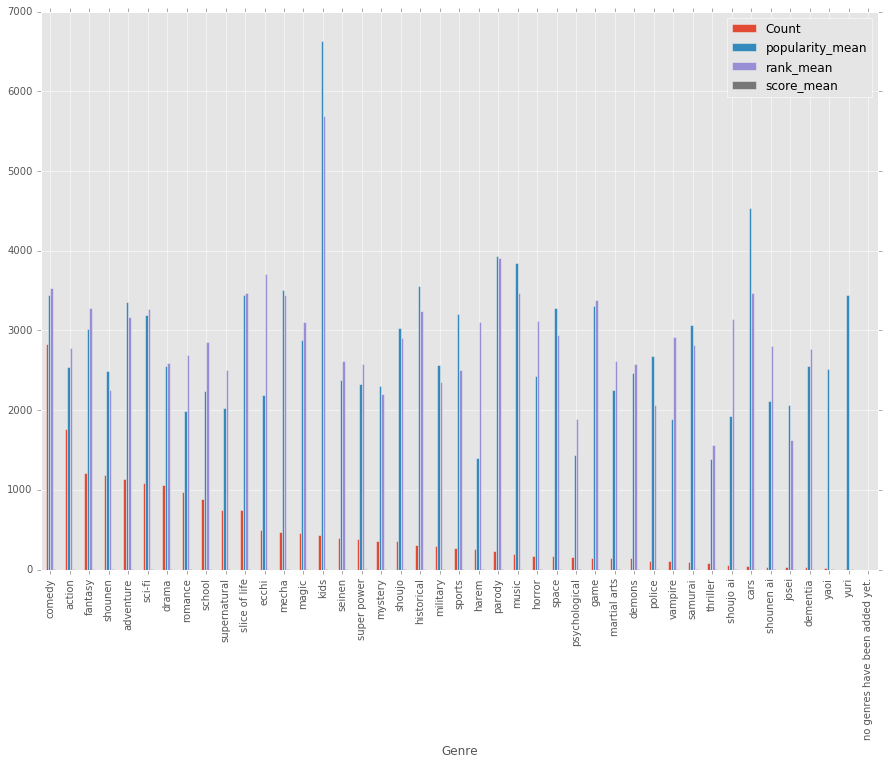

In [55]:
genre_plot = genre_df.plot(kind = 'bar', x = 'Genre')

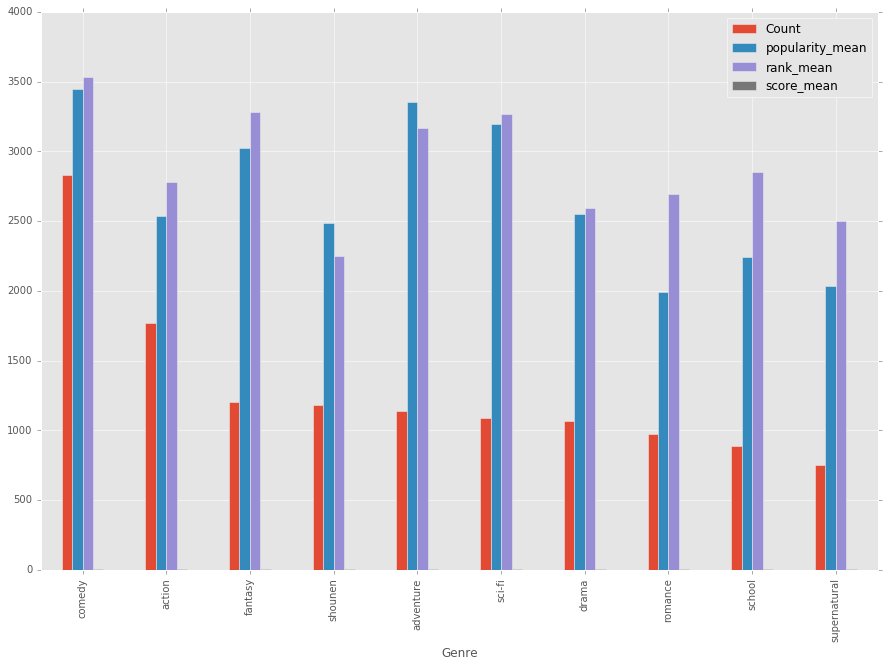

In [56]:
## top 10 genre 
genre_df.sort_values('Count', ascending = False, inplace = True)
genre_df_top = genre_df.head(10)
genre_plot_2 = genre_df_top.plot(kind = 'bar', x = 'Genre')

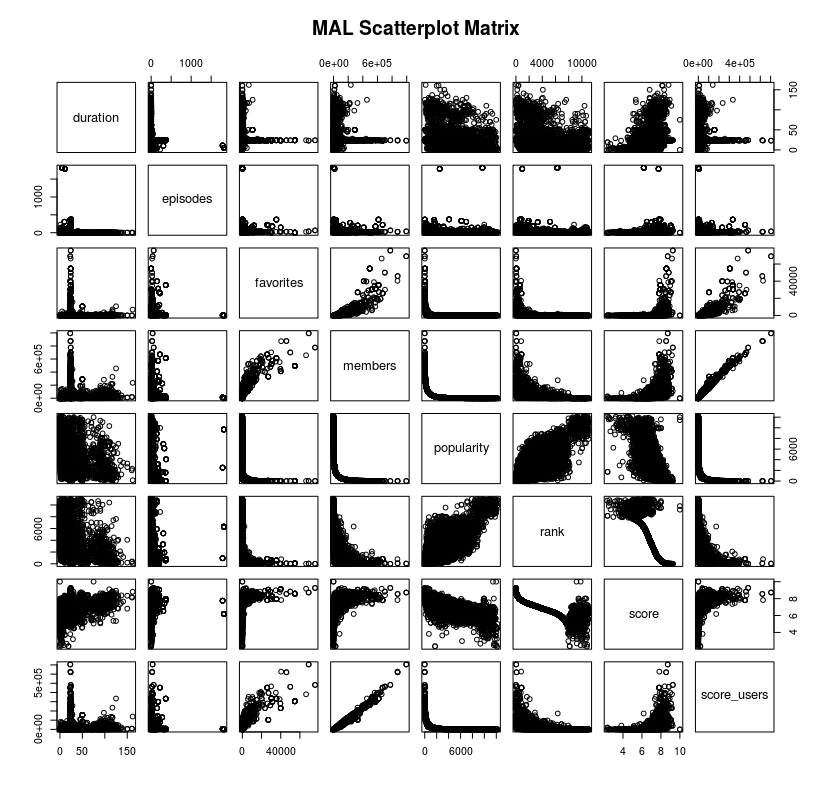

In [57]:
Image('Rcode/scatterplotMatrix.png')

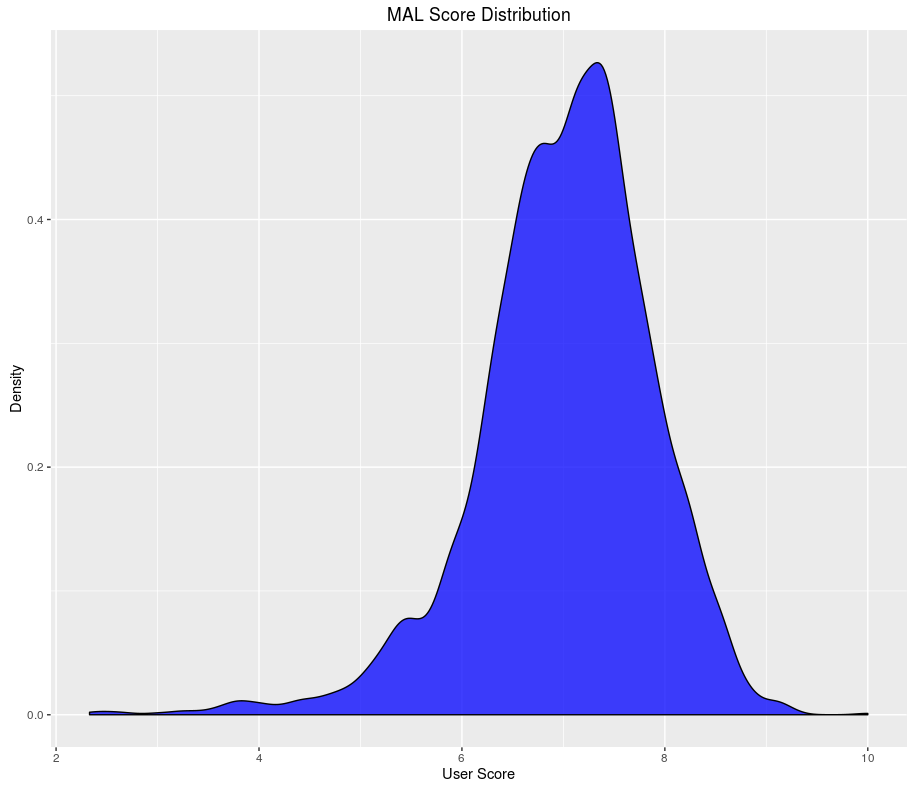

In [58]:
Image("Rcode/scoreDen.png")